<img alt='UCL' src="images/ucl_logo.png" align='center'>


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](016_Python_for.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](018_Python_xxx.ipynb)



# 025 NASA MODIS Earthdata


## Introduction

### Purpose 

In this notebook, we will use high-level codes from `geog0111` to familiarise ourselves with downloading and interpreting NASA MODIS datasets from [`NASA EarthData`](https://urs.earthdata.nasa.gov). We will also be visualising these data in this notebook.

We will be **introducing NASA MODIS land products**, and viewing the MODIS LAI product as an example. This notebook should serve as an introduction to accessing similar products from Earthdata.

We will use [`pathlib`](https://docs.python.org/3/library/pathlib.html) and the local package [gurlpath](geog0111/gurlpath) derived from [`urlpath`](https://github.com/chrono-meter/urlpath) to open object streams from URLs and files. 

For further work on NASA datasets, a student might consider using an explicit [API](https://en.wikipedia.org/wiki/Application_programming_interface) to access the data. If all you want is to get hold of some data product for some defined location and time, then you might use an API such as [Appeears](https://lpdaacsvc.cr.usgs.gov/appeears/).


### Prerequisites

Since the idea of this section is to get used to the datasets, the requirement for coding is quite low. You should have some familiarity with the following:

* [001 Using Notebooks](001_Notebook_use.ipynb)
* [002 Unix](002_Unix.ipynb) with a good familiarity with the UNIX commands we have been through.
* [010 Variables, comments and print()](010_Python_Introduction.ipynb)
* [011 Data types](011_Python_data_types.ipynb) 
* [024 Image display](024_Image_display)


### Test

You should run a [NASA account test](notebooks/004_Accounts.ipynb#Test) if you have not already done so.

## MODIS LAI product 

To introduce geospatial processing, we will use a dataset from the MODIS LAI product over the UK. 

The data product [MOD15](https://modis.gsfc.nasa.gov/data/dataprod/mod15.php) LAI/FPAR has been generated from NASA MODIS sensors Terra and Aqua data since 2002. We are now in dataset collection 6 (the data version to use).

    LAI is defined as the one-sided green leaf area per unit ground area in broadleaf canopies and as half the total needle surface area per unit ground area in coniferous canopies. FPAR is the fraction of photosynthetically active radiation (400-700 nm) absorbed by green vegetation. Both variables are used for calculating surface photosynthesis, evapotranspiration, and net primary production, which in turn are used to calculate terrestrial energy, carbon, water cycle processes, and biogeochemistry of vegetation. Algorithm refinements have improved quality of retrievals and consistency with field measurements over all biomes, with a focus on woody vegetation.
    
We use such data to map and understand about the dynamics of terrestrial vegetation / carbon, for example, for climate studies.

The raster data are arranged in tiles, indexed by row and column, to cover the globe:


![MODIS tiles](https://www.researchgate.net/profile/J_Townshend/publication/220473201/figure/fig5/AS:277546596880390@1443183673583/The-global-MODIS-Sinusoidal-tile-grid.png)


#### Exercise 1

The pattern on the tile names is `hXXvYY` where `XX` is the horizontal coordinate and `YY` the vertical.


* use the map above to work out the names of the two tiles that we will need to access data over the UK
* set the variable `tiles` to contain these two names in a list

For example, for the two tiles covering Madagascar, we would set:

    tiles = ['h22v10','h22v11']

In [1]:
# tiles for the UK

tiles = ['h17v03', 'h17v04', 'h18v03', 'h18v04']


### Accessing NASA MODIS URLs

<span class="burk">**Warning: The NASA data servers tend to be down for maintainance on Wednesday morning EST**</span>

Although you can access MODIS datasets through the [NASA Earthdata](https://urs.earthdata.nasa.gov/home) interface, there are many occasions that we would want to just automatically pull datasets. As we note above, we could use some existing API for this, such as [Appeears](https://lpdaacsvc.cr.usgs.gov/appeears/), but we are aiming here at being able to ultimately develop codes that do this from a lower-level perspective. 

Automation has many roles, and is particularly useful when you want a time series of data that might involve many files. For example, for analysing LAI or other variables over space/time) we will want to write code that pulls the time series of data. 

If you visit the site [https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006](https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006), you will see 'date' style links (e.g. `2018.09.30`) through to sub-directories. 

In these, e.g. [https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006/2018.09.30/](https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006/2018.09.30/) you will find URLs of a set of files. 

The files pointed to by the URLs are the MODIS MOD15 4-day composite 500 m LAI/FPAR product [MCD15A3H](https://lpdaac.usgs.gov/dataset_discovery/modis/modis_products_table/mcd15a3h_v006).

There are links to several datasets on the page, including 'quicklook files' that are jpeg format images of the datasets, e.g.:

![MCD15A3H.A2018273.h17v03](https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006/2018.09.30/BROWSE.MCD15A3H.A2018273.h17v03.006.2018278143630.1.jpg)

as well as `xml` files and `hdf` datasets. 



### Data Products

If we look at the dataserver we have specified [https://e4ftl01.cr.usgs.gov](https://e4ftl01.cr.usgs.gov), we will see that a number of sub-directories exist. Each of these 'server directories' points to a different data stream:

    [DIR] ASTT/                   2019-08-05 07:54    -   
    [DIR] COMMUNITY/              2020-06-02 08:45    -   
    [DIR] ECOSTRESS/              2020-04-09 10:30    -   
    [DIR] GEDI/                   2020-02-10 09:58    -   
    [DIR] MEASURES/               2020-03-17 10:55    -   
    [DIR] MOLA/                   2020-06-01 09:20    -   
    [DIR] MOLT/                   2020-04-14 08:06    -   
    [DIR] MOTA/                   2019-12-27 06:49    -   
    [DIR] VIIRS/                  2020-06-23 10:26    -   

For example, we might notice [VIIRS](https://e4ftl01.cr.usgs.gov/VIIRS) which takes us to the [VIIRS data products](https://viirsland.gsfc.nasa.gov), or [GEDI](https://e4ftl01.cr.usgs.gov/GEDI) [spaceborne lidar](https://gedi.umd.edu/) data. Each of these data streams will have their own properties that we need to appreciate before using them.

### MOTA

The URL we have used above, [https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006/2018.09.30/](https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006/2018.09.30/) starts with a call to the server directory `MOTA`, so we can think of `https://e4ftl01.cr.usgs.gov/MOTA` as the base level URL.

MOTA refers to combined MODIS Terra and Aqua datasets. Similarly, MOLA and MOLT refer to datasets generated from single MODIS sensors of Aqua and Terra, respectively.

The rest of the directory information `MCD15A3H.006/2018.09.30` tells us:

* the product name `MCD15A3H`
* the product version `006`
* the date of the dataset `2018.09.30`

There are several ways we could specify the date information. The most 'human readable' is probably `YYYY.MM.DD` as given here, but we may also use day of year. Recall from [023 Plotting](023_Plotting.ipynb#datetime) how to convert date formats.

We will mainly use [`geog0111.im_display`](geog0111/im_display.py) to do simple image plots. This is essentially the same as the code you have developed in [an exercise](024_Image_display.ipynb#Exercise-2).


If we look at the [product specification page](https://lpdaac.usgs.gov/products/mcd15a3hv006/) for `MCD15A3H` we see that the data product has multiple data layers. In the case of MCD15A3H, this is:

|SDS Name	|Description	| Units	|Data Type	|Fill Value|	No Data Value	|Valid Range|	Scale Factor
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|-|
| Fpar_500m |	Fraction of Photosynthetically Active Radiation	|Percent|	8-bit unsigned integer	|249 to 255	|N/A	|0 to 100	|0.01
|Lai_500m	|Leaf Area Index|	m²/m²|	8-bit unsigned integer|	249 to 255	|N/A|	0 to 100|	0.1|
|FparLai_QC	|Quality for  FPAR and LAI	|Class Flag	|8-bit unsigned integer	|255|	N/A	|0 to 254	|N/A
| FparExtra_QC	|Extra detail Quality for  FPAR and LAI	|Class Flag|	8-bit unsigned integer|	255	|N/A	|0 to 254	|N/A
|FparStdDev_500m|	Standard deviation of  FPAR	|Percent|	8-bit unsigned integer|	248 to 255	|N/A|	0 to 100	|0.01
|LaiStdDev_500m|	Standard deviation of LAI	|m²/m²|	8-bit unsigned integer|	248 to 255|	N/A	|0 to 100	|0.1


We will use a simple recipe for accessing a dataset and plotting it. All examples below will follow the same pattern.

First, we use the `Modis` class in `geog0111.modis` to get the dataset. Recall from [024 Image display](024_Image_display) that many of these datasets are cached on the system for you. If it takes a long time to retrieve a dataset, it is probably because you are downloading it, rather than using a cached copy. If it is Wednesday afternoon UK time, you will not be able to download new datasets, and can only use cached copies, as the NASA server is down for maintenance.

In [2]:
from geog0111.modis import Modis
#######################
# specify what we want
# in a dictionary
#######################
# UK tiles

kwargs = {
    'tile'      :    ['h17v03', 'h17v04', 'h18v03', 'h18v04'],
    'product'   :    'MCD15A3H',
    'sds'       :    'Lai_500m',
}
modis = Modis(**kwargs)
# specify day of year (DOY) and year
data_MCD15A3H = modis.get_data(2019,1+4*10)

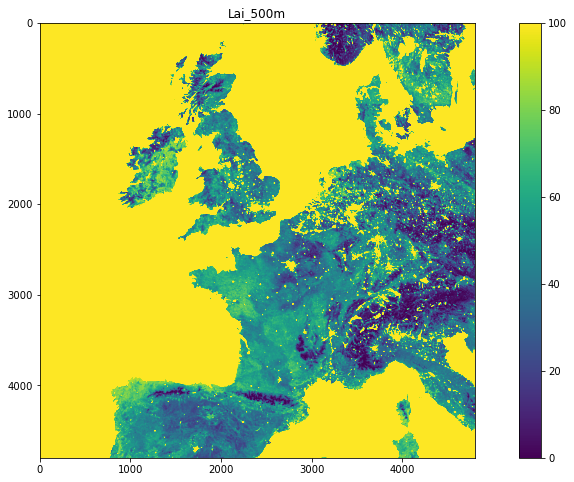

In [3]:
from geog0111.im_display import im_display

im_display(data_MCD15A3H,['Lai_500m'],x_size=16,y_size=8,vmax=100)

### masking

We can see from the  [product specification page](https://lpdaac.usgs.gov/products/mcd15a3hv006/) for `MCD15A3H` that values above `100` for `Lai_500m` are invalid. In addition, a scale factor of 0.1 should be applied.


We will learn more of this later, but for now, note that we can use code such as the following to apply the scaling factor and mask invalid numbers. We need to import the `numpy` package for this first (`import numpy as np`).

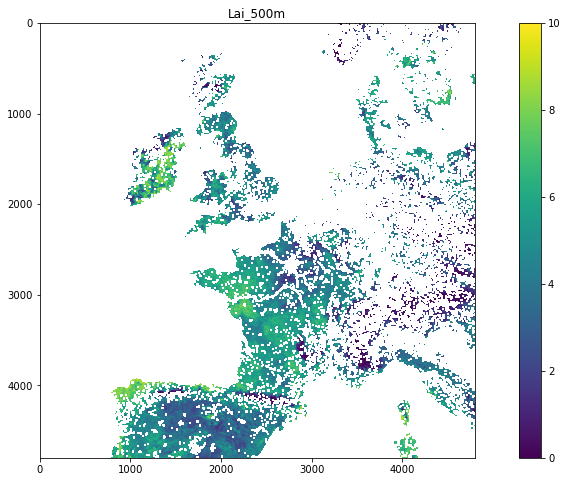

In [4]:
import numpy as np

kwargs = {
    'tile'      :    ['h17v03', 'h17v04', 'h18v03', 'h18v04'],
    'product'   :    'MCD15A3H',
    'sds'       :    'Lai_500m',
}
modis = Modis(**kwargs)

# repull dataset
data_MCD15A3H = modis.get_data(2019,1+4*10)

# multiply by scale
scale = 0.1
ds = data_MCD15A3H['Lai_500m'] * scale
# mask invalid by setting to 
ds[ds>100 * scale] = np.nan

# load back into data_MCD15A3H
data_MCD15A3H['Lai_500m'] = ds

# plot
im_display(data_MCD15A3H,['Lai_500m'],x_size=16,y_size=8)

The dataset, being a measurement, is not spatially complete. This is because of clouds and other factors meaning that the algorithm to produce LAI could not run at that time. It is very common that you will find geospatial datasets have missing values. We will learn later on when and how we might fill these gaps.

#### Exercise 2: mask invalid data

* write a function called `data_mask` that is given:
    * a data dictionary
    * a list of sds strings
    * a list of scale factors
    * a list of upper threshold values
    * a list of lower threshold values
  and returns the dictionary with the scaled and masked datasets 
  
* plot both `Lai_500m` and `LaiStdDev_500m` side-by-side. You should apply appropriate scaling factors and masking as above.

In [5]:
# ANSWER
from geog0111.modis import Modis
from geog0111.im_display import im_display
import numpy as np

def data_mask(data,sds,scales,uthresh,lthresh):
    '''
    given:
    
    data     : data dictionary
    sds      : list of sds strings
    scales   : list of scale factors
    uthresh  : list of upper threshold values
    lthresh  : list of upper threshold values
    
    return the dictionary with the scaled 
    and masked datasets 
    '''
    for i,s in enumerate(sds):
        scale = scales[i]
        ds = data[s] * scale
        # mask invalid by setting to 
        if uthresh[i] != None:
            ds[ds>=uthresh[i] * scale] = np.nan
        if lthresh[i] != None:
            import pdb;pdb.set_trace()
            ds[ds<=lthresh[i] * scale] = np.nan
        # load back into data_MCD15A3H
        data[s] = ds
    return data

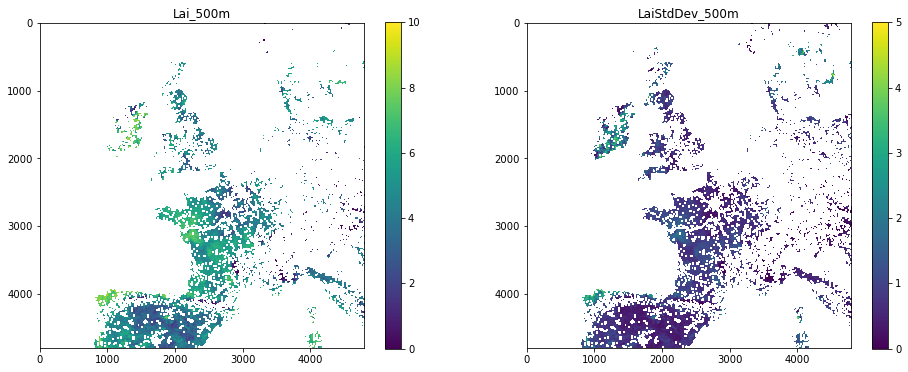

In [6]:
# ANSWER
# put the required SDS in the sds field of kwargs

kwargs = {
    'tile'      :    ['h17v03', 'h17v04', 'h18v03', 'h18v04'],
    'product'   :    'MCD15A3H',
    'sds'       :    ['Lai_500m','LaiStdDev_500m']
}

# get the data
modis = Modis(**kwargs)
# specify day of year (DOY) and year
data_MCD15A3H = modis.get_data(2019,1+4*10)

sds     = kwargs['sds']
scale   = [0.1, 0.1]
uthresh = [100,100]
lthresh = [None,None]

data_MCD15A3H = data_mask(data_MCD15A3H,sds,scale,uthresh,lthresh)
# plot with different vmax for the plots!
im_display(data_MCD15A3H,kwargs['sds'],shape=(1,2),x_size=16,y_size=3,vmax=[10,5])

## Burned area dataset `MCD64A1`

We can use the same codes to access different MODIS datasets. For example the monthly [`MCD64A1`](https://lpdaac.usgs.gov/products/mcd64a1v006/) product:

[![MCD15A3H](images/MCD15A3H.png)](https://lpdaac.usgs.gov/products/mcd64a1v006/)

For the `Burn Date` field, values of -2 to 0 are invalid. We can visualise this with code as above, but first we need to get the day of year for the month we want. Recall from [023 Plotting](023_Plotting.ipynb#datetime) that we can use `datetime` for this. We do this by working out the difference between the day of the month in question and the 31st day of December for the previous year.

In [7]:
from datetime import datetime

year = 2019
day = 1
for month in range(1,13):
    doy = (datetime(year,month,day) - datetime(year-1,12,31)).days
    print(f'1st of {month:<2d} is doy {doy}')

1st of 1  is doy 1
1st of 2  is doy 32
1st of 3  is doy 60
1st of 4  is doy 91
1st of 5  is doy 121
1st of 6  is doy 152
1st of 7  is doy 182
1st of 8  is doy 213
1st of 9  is doy 244
1st of 10 is doy 274
1st of 11 is doy 305
1st of 12 is doy 335


#### Exercise 3

* write a function called `get_doy` that is given the year, month and day integer and returns the day of year
* test it

In [8]:
# ANSWER
from datetime import datetime

def get_doy(year,month,day):
    '''
    function that is given 
    
    the year 
    and month integer 
        
    and returns the day of year
    '''
    doy = (datetime(year,month,day) - datetime(year-1,12,31)).days
    return doy


In [11]:
# TEST

assert get_doy(2019,1,1) == 1
assert get_doy(2019,2,1) == 32

We now simply need to encode any scale factors or invalidity thresholds, and we can plot the dataset:

In [12]:
# test for Jan and Feb
assert get_doy(2019,1) == 1
assert get_doy(2019,2) == 32

TypeError: get_doy() missing 1 required positional argument: 'day'

152


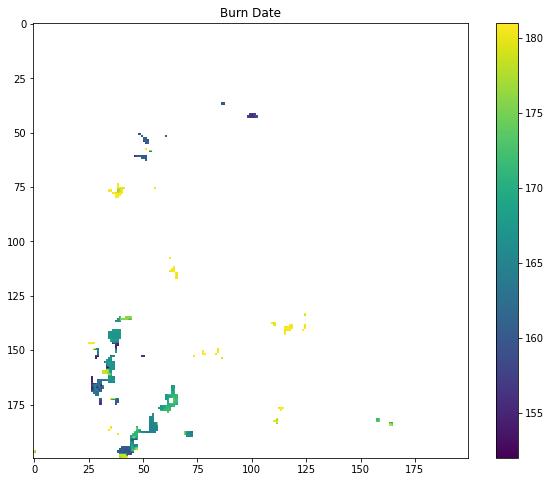

In [13]:
from geog0111.modis import Modis
from geog0111.im_display import im_display
from geog0111.data_mask import data_mask
from geog0111.get_doy import get_doy

# h22v10 is Madagascar
kwargs = {
    'tile'      :    ['h22v10'],
    'product'   :    'MCD64A1',
    'sds'       :    ['Burn Date']
}

year  = 2019
month = 6

scale   = [1]
uthresh = [200]
lthresh = [0]
sds     = kwargs['sds']

doy = get_doy(year,month,1)
print(doy)
# get the data
modis = Modis(**kwargs)
# specify day of year (DOY) and year
data_MCD64A1 = modis.get_data(2019,doy)
data_MCD64A1 = data_mask(data_MCD64A1,sds,scale,uthresh,lthresh)

# have to take sub-area to see anything here:
# define row and column min/max with r=[1500,2000],c=[1000,1500]
im_display(data_MCD64A1,kwargs['sds'],\
           x_size=10,y_size=8,\
           r=[1800,2000],c=[1000,1200])

## Snow
    
There are two MODIS daily snow cover datasets: [`MOD10A1` and `MYD10A1`](https://modis-snow-ice.gsfc.nasa.gov/?c=MOD10A1) for data from the MODIS Terra and Aqua sensors, respectively. The field [`NDSI_Snow_Cover`](https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MOD10A1) has valid values in the range 0 to 100.


In [14]:
from geog0111.modis import Modis
from geog0111.im_display import im_display
from geog0111.data_mask import data_mask
from geog0111.get_doy import get_doy

kwargs = {
    'tile'      :    ['h19v03'],
    'product'   :    'MOD10A1',
    'sds'       :     ['NDSI_Snow_Cover']
}

# look in the winter
year  = 2019
month = 12
day = 1

scale   = [1]
uthresh = [101]
lthresh = [-1]
sds     = kwargs['sds']

doy = get_doy(year,month,day)
print(doy)
# get the data
modis = Modis(**kwargs)
# specify day of year (DOY) and year
data_MOD10A1 = modis.get_data(2019,doy)
data_MOD10A1 = data_mask(data_MOD10A1,sds,scale,uthresh,lthresh)

335


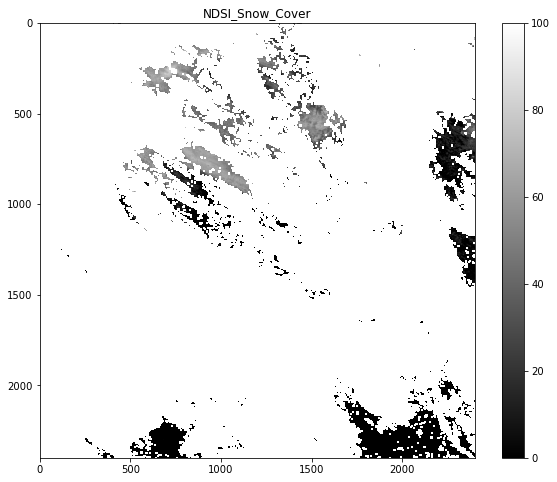

In [15]:
# have to take sub-area to see anything here:
# define row and column min/max with r=[1500,2000],c=[1000,1500]
im_display(data_MOD10A1,kwargs['sds'],\
           x_size=10,y_size=8,colourmap='gray',vmin=0,vmax=100)

## Land Cover dataset `MCD12Q1`
    
One of the MODIS land cover products is `MCD12Q1`. We briefly examined this product in the previous session, but can take the chance now to explore it further. The datasets are yearly, given for `doy` 1. Details of the product can be found at the product page (`MCD12Q1`)[https://lpdaac.usgs.gov/products/mcd12q1v006/].

We previously developed a code [`get_lc`](geog0111/plot_lc.py) to set up the colourmaps and plot the `LC_Type1` for a given year and set of tiles. This is the `Land Cover Type 1: Annual International Geosphere-Biosphere Programme (IGBP) classification`. 

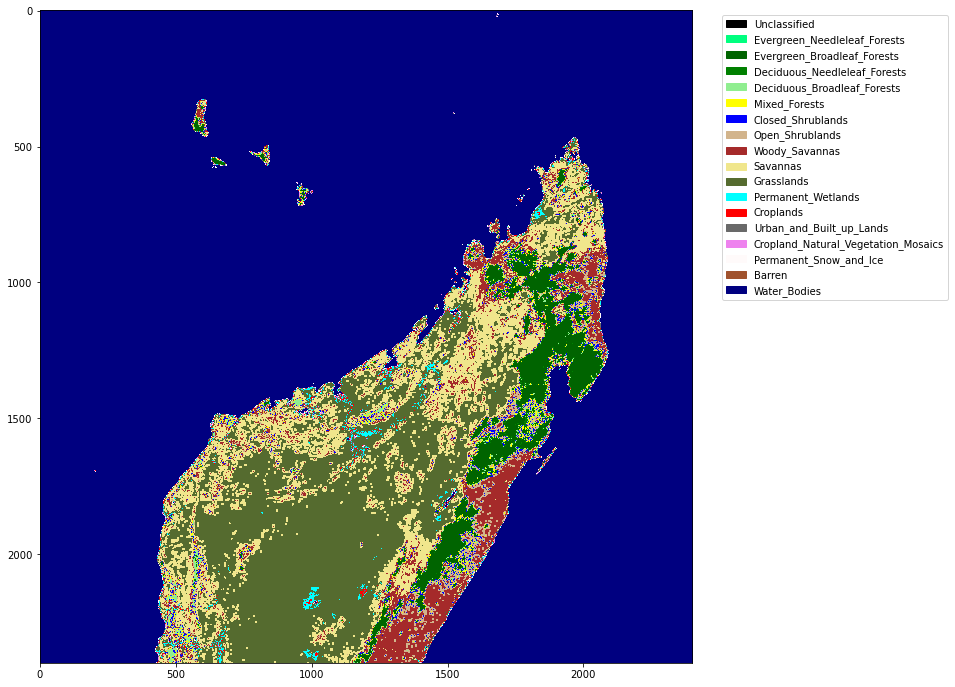

In [16]:
from geog0111.plot_lc import plot_lc
from geog0111.modis import Modis
# Madagascar
year,tiles = 2018,['h22v10']

# ensure tiles is a list
kwargs = {
    'tile'      :    list(tiles),
    'product'   :    'MCD12Q1',
    'sds'       :    ['LC_Type1']
}
# get the data
modis = Modis(**kwargs)
# specify day of year (DOY) and year
data_MCD12Q1 = modis.get_data(year,1)
# the data we want here
plot_lc(data_MCD12Q1['LC_Type1'])

#### Exercise 5

* Explore the MODIS datasets in your own time, and get to know the datasets they contain, along with the scaling factors and other interpretation information.

# Summary

In these notes, we have introduced the characteristics of MODIS data products, and learned how to specify, access, and display them for a number of datasets. You will have accessed a number of products under a number of conditions in the exercises, but you are encouraged to explore this further.

The main item to do with using data products of this sort, that we haven't covered yet, is the interpretation of Quality Assurance (QA) data. This is often packed information into bits, and can be a little tricky at first. However, as with above, once you have a little familiarisation with a few cases, you will be able to apply this more widely.

You should spend some time going through the various links to explore the different datasets, and try out the exercises above for various products. The familiarity you gain from this will help when it comes to building our own codes later on.


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](016_Python_for.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](014_Python_groups.ipynb)
